In [251]:
#Se crea una estructura de un dataframe para cargar los datos
import pandas as pd   
# Permite cargar el modelo logistica de regresión
from sklearn.linear_model import LogisticRegression 

In [642]:
#se define un data frame para cargar el archivo que contiene los datos de entrenamiento
dfNetwork = pd.read_csv("/Machine Learning/Data/trafficunicor_ml_2mx.csv")
#se muestra el dataframe
dfNetwork.head()

,src_ip,dst_ip,src_port,dst_port,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_bytes,target_traffic,size_traffic
0,172.16.40.180,172.16.40.1,51954,161,1651680236239,1651680236283,3038,1,44874052
1,172.16.40.180,172.16.40.1,51954,161,1651680236283,1651680236364,686,1,44874052
2,172.16.40.180,172.16.40.6,51954,161,1651680236279,1651680236365,2175,0,9667864
3,172.16.40.180,172.16.40.1,51954,161,1651680236364,1651680236367,690,1,44874052
4,172.16.40.180,172.16.40.2,51954,161,1651680236239,1651680236420,3310,0,41211180


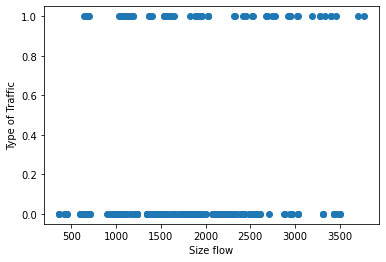

In [643]:
#Se visualiza en una gráfico de dispersión presencia de arañas y tamaño de los granos de arena
import matplotlib.pyplot as plott
%matplotlib inline
plott.ylabel('Type of Traffic')
plott.xlabel('Size flow')
plott.scatter(dfNetwork['bidirectional_bytes'],dfNetwork['target_traffic'])

In [644]:
#Se elimina los espacios al principio y al final de la cadena:
#en el eventual caso de que los hubiera
dfNetwork.columns=dfNetwork.columns.str.strip()

In [645]:
#Se almacena en la variable inputs la variables independientes y en mytarget la variable dependiente
inputs_X=dfNetwork.drop('src_ip', axis='columns')
# Se elimina la columna id, debido a que no es relevante
inputs_X=dfNetwork.drop('dst_ip', axis='columns')

In [646]:
#En X se separan las variables independientes, en este caso el tamo de los granos de arena
#X= dfNetwork[['src_port','dst_port','bidirectional_first_seen_ms','bidirectional_last_seen_ms','bidirectional_bytes']]
X= dfNetwork[['src_port','dst_port','bidirectional_bytes','size_traffic']]

X                 
#En y se asigna la variable dependiente que en este caso presencia de arañas (donde 1 indicia que hay arañas y 0 no hay arañas)
y=dfNetwork['target_traffic']
#Se visualizan las variables independientes 
X.head()

,src_port,dst_port,bidirectional_bytes,size_traffic
0,51954,161,3038,44874052
1,51954,161,686,44874052
2,51954,161,2175,9667864
3,51954,161,690,44874052
4,51954,161,3310,41211180


In [647]:
#train_test_split permite la separación de datos de entrenamiento y pruebas
from sklearn.model_selection import train_test_split
#Se dividen los datos en en entrenamiento y pruebas, además se define mediante test_size=0.2 el porcentaje para pruebas
#También se puede definir de forma aleatoria que datos se utilizarán para el entrenamiento mediante random_state=10
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=30)

In [648]:
#Permite viusalizar información del dataframe
dfNetwork.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3671 entries, 0 to 3670
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   src_ip                       3671 non-null   object
 1   dst_ip                       3671 non-null   object
 2   src_port                     3671 non-null   int64 
 3   dst_port                     3671 non-null   int64 
 4   bidirectional_first_seen_ms  3671 non-null   int64 
 5   bidirectional_last_seen_ms   3671 non-null   int64 
 6   bidirectional_bytes          3671 non-null   int64 
 7   target_traffic               3671 non-null   int64 
 8   size_traffic                 3671 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 258.2+ KB


In [649]:
#permite mostrar estadísticas del resumen de las variables numéricas
round(dfNetwork.describe(),2)

,src_port,dst_port,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_bytes,target_traffic,size_traffic
count,3671.00,3671.00,3.671000e+03,3.671000e+03,3671.00,3671.00,3671.00
mean,26696.29,25358.71,1.651680e+12,1.651680e+12,833.83,0.03,15260642.10
std,25889.75,25889.58,9.484580e+03,9.489350e+03,469.52,0.17,12073993.54
min,0.00,0.00,1.651680e+12,1.651680e+12,364.00,0.00,444.00
25%,161.00,161.00,1.651680e+12,1.651680e+12,627.00,0.00,6532321.00
50%,51954.00,161.00,1.651680e+12,1.651680e+12,647.00,0.00,10972390.00
75%,51954.00,51954.00,1.651680e+12,1.651680e+12,667.00,0.00,16497072.00
max,51954.00,51954.00,1.651680e+12,1.651680e+12,3767.00,1.00,44875729.00


In [650]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaler.fit_transform se utiliza para el ajuste  de parámetros iniciales de acuerdo al conjunto de datos de entrenamiento
#además devuelve la trnasformada
X_train = scaler.fit_transform(X_train)
#scaler.transform se utiliza para para calcular la media y la desviación estándar en un conjunto de entrenamiento para poder volver a aplicar más tarde,
#la misma transformación en el conjunto de prueba.
X_test = scaler.transform(X_test)

In [651]:
#X_train

In [652]:
y_train

916     0
2719    0
1048    0
2822    1
2076    0
       ..
1164    0
500     0
2989    0
421     0
1829    0
Name: target_traffic, Length: 2936, dtype: int64

In [653]:
#Permite conocer cuantas variables se van a utilizar
cols=X.columns

In [654]:
#Se define a los datos de entrenamiento el número de columnas del dataframe que corresponden a las variables independientes
X_train = pd.DataFrame(X_train, columns=[cols])

In [655]:
#Visualiza las estadísticas del las diferentes variables independientes
X_train.describe()

,src_port,dst_port,bidirectional_bytes,size_traffic
count,2.936000e+03,2.936000e+03,2.936000e+03,2.936000e+03
mean,4.598199e-17,-1.089047e-17,-1.064846e-16,2.662115e-17
std,1.000170e+00,1.000170e+00,1.000170e+00,1.000170e+00
min,-1.042972e+00,-9.688169e-01,-9.987237e-01,-1.264148e+00
25%,-1.036750e+00,-9.625950e-01,-4.374653e-01,-7.205073e-01
50%,9.647426e-01,-9.625950e-01,-3.947841e-01,-3.667785e-01
75%,9.647426e-01,1.038961e+00,-3.521028e-01,1.088469e-01
max,9.647426e-01,1.038961e+00,6.122642e+00,2.470768e+00


In [656]:
from sklearn.linear_model import LogisticRegression 
# Se importa el clasificador SVC
from sklearn.svm import SVC
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se importa el modelo de predicción de Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
modelreg=LogisticRegression()
modelreg.fit(X_train,y_train)

c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

In [657]:
#Permite la normalización de los datos de entrenamiento  normalmente distribuidos estándar: Gaussian con media cero y varianza de unidad
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

In [658]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [659]:
def get_score(model, X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [660]:
get_score(LogisticRegression(),X_train,X_test,y_train,y_test)

c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9782312925170068

In [661]:
get_score(SVC(),X_train,X_test,y_train,y_test)

c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9863945578231292

In [662]:
get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test)

c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


1.0

In [663]:
get_score(GaussianNB(),X_train,X_test,y_train,y_test)

c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9387755102040817

In [664]:
from sklearn import preprocessing
# Se importa el clasificador SVC
from sklearn.svm import SVC
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se importa el modelo de predicción de Naive Bayes
from sklearn.naive_bayes import GaussianNB

lg_score = []
svm_score = []
rf_score = []
nby_score = []
lda_score = []
knc_score = []
dtree_score = []
for train_index,test_index in kf.split(X):
    X_train,X_test=X.iloc[train_index,:],X.iloc[test_index,:]
    #scale preprocesa los datos para ser normalizados posteriormente
    scaler = preprocessing.StandardScaler().fit(X_train)
    y_train,y_test=y[train_index],y[test_index]
    #Normaliza los datos
    X_scaled = scaler.transform(X_train)
    lg_score.append(get_score(LogisticRegression(),X_scaled,X_test,y_train,y_test))
    svm_score.append(get_score(SVC(),X_train,X_test,y_train,y_test))
    rf_score.append(get_score(RandomForestClassifier(n_estimators=20),X_train,X_test,y_train,y_test))
    nby_score.append(get_score(GaussianNB(),X_train,X_test,y_train,y_test))
    lda_score.append(get_score(LinearDiscriminantAnalysis(),X_train,X_test,y_train,y_test))
    knc_score.append(get_score(KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree'),X_train,X_test,y_train,y_test))
    dtree_score.append(get_score(DecisionTreeClassifier(criterion='entropy'),X_train,X_test,y_train,y_test))

c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [665]:
lg_score

[0.02585034013605442,
 0.014986376021798364,
 0.0340599455040872,
 0.05449591280653951,
 0.031335149863760216]

In [666]:
svm_score

[0.9741496598639455,
 0.9850136239782016,
 0.9700272479564033,
 0.946866485013624,
 0.9686648501362398]

In [667]:
rf_score

[1.0, 1.0, 1.0, 1.0, 1.0]

In [668]:
nby_score

[0.9809523809523809,
 0.9918256130790191,
 0.9836512261580381,
 0.8923705722070845,
 0.896457765667575]

In [669]:
lda_score

[0.9714285714285714,
 0.9822888283378747,
 0.9713896457765667,
 0.9509536784741145,
 0.8841961852861036]

In [670]:
knc_score

[1.0, 1.0, 1.0, 1.0, 1.0]

In [671]:
dtree_score

[1.0, 1.0, 1.0, 1.0, 1.0]

In [672]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(),X_train,y_train)

array([0.96768707, 0.96938776, 0.9693356 , 0.9693356 , 0.88756388])

In [673]:
cross_val_score(LogisticRegression(),X_train,y_train)

array([0.98809524, 0.98809524, 0.9846678 , 0.98807496, 0.98126065])

In [674]:
cross_val_score(RandomForestClassifier(n_estimators=40),X_train,y_train)

array([1., 1., 1., 1., 1.])

In [675]:
cross_val_score(GaussianNB(),X_train,y_train)

array([0.97959184, 0.98809524, 0.98807496, 0.96763203, 0.88756388])

In [676]:
cross_val_score(LinearDiscriminantAnalysis(),X_train,y_train)

array([0.9744898 , 0.9829932 , 0.98296422, 0.95741056, 0.77342419])

In [677]:

cross_val_score(KNeighborsClassifier(),X_train,y_train)

array([1., 1., 1., 1., 1.])

In [678]:
cross_val_score(DecisionTreeClassifier(),X_train,y_train)

array([1., 1., 1., 1., 1.])

In [679]:
#Se importa el modelo de predicción de bosque aleatorio
from sklearn.ensemble import RandomForestClassifier
#Se instancia el modelo de clasificación
model = RandomForestClassifier()
#Al modelo se le pasan los parámetros de entrenamiento
model.fit(X_train,y_train)

RandomForestClassifier()

In [680]:
#Se visualizan las predicciones de acuerdo al dataset de prueba
y_predicted = model.predict(X_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [681]:
#Se utiliza la matriz de confusión para observar las aproximaciones del modelo
from sklearn.metrics import  confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
cm

array([[711,   0],
       [  0,  23]], dtype=int64)

Text(69.0, 0.5, 'Verdadero')

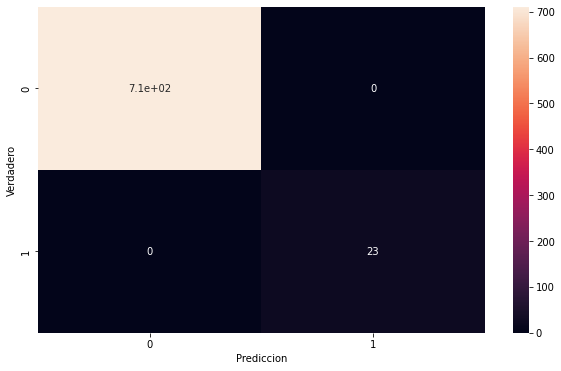

In [682]:
#seaborn es una biblioteca para hacer gráficos estadísticos
#Si tiene problemas para ejecutar seaborn ejecute la siguiente instruccion: pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Prediccion')
plt.ylabel('Verdadero')

In [683]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[711   0]
 [  0  23]]

True Positives(TP) =  711

True Negatives(TN) =  23

False Positives(FP) =  0

False Negatives(FN) =  0


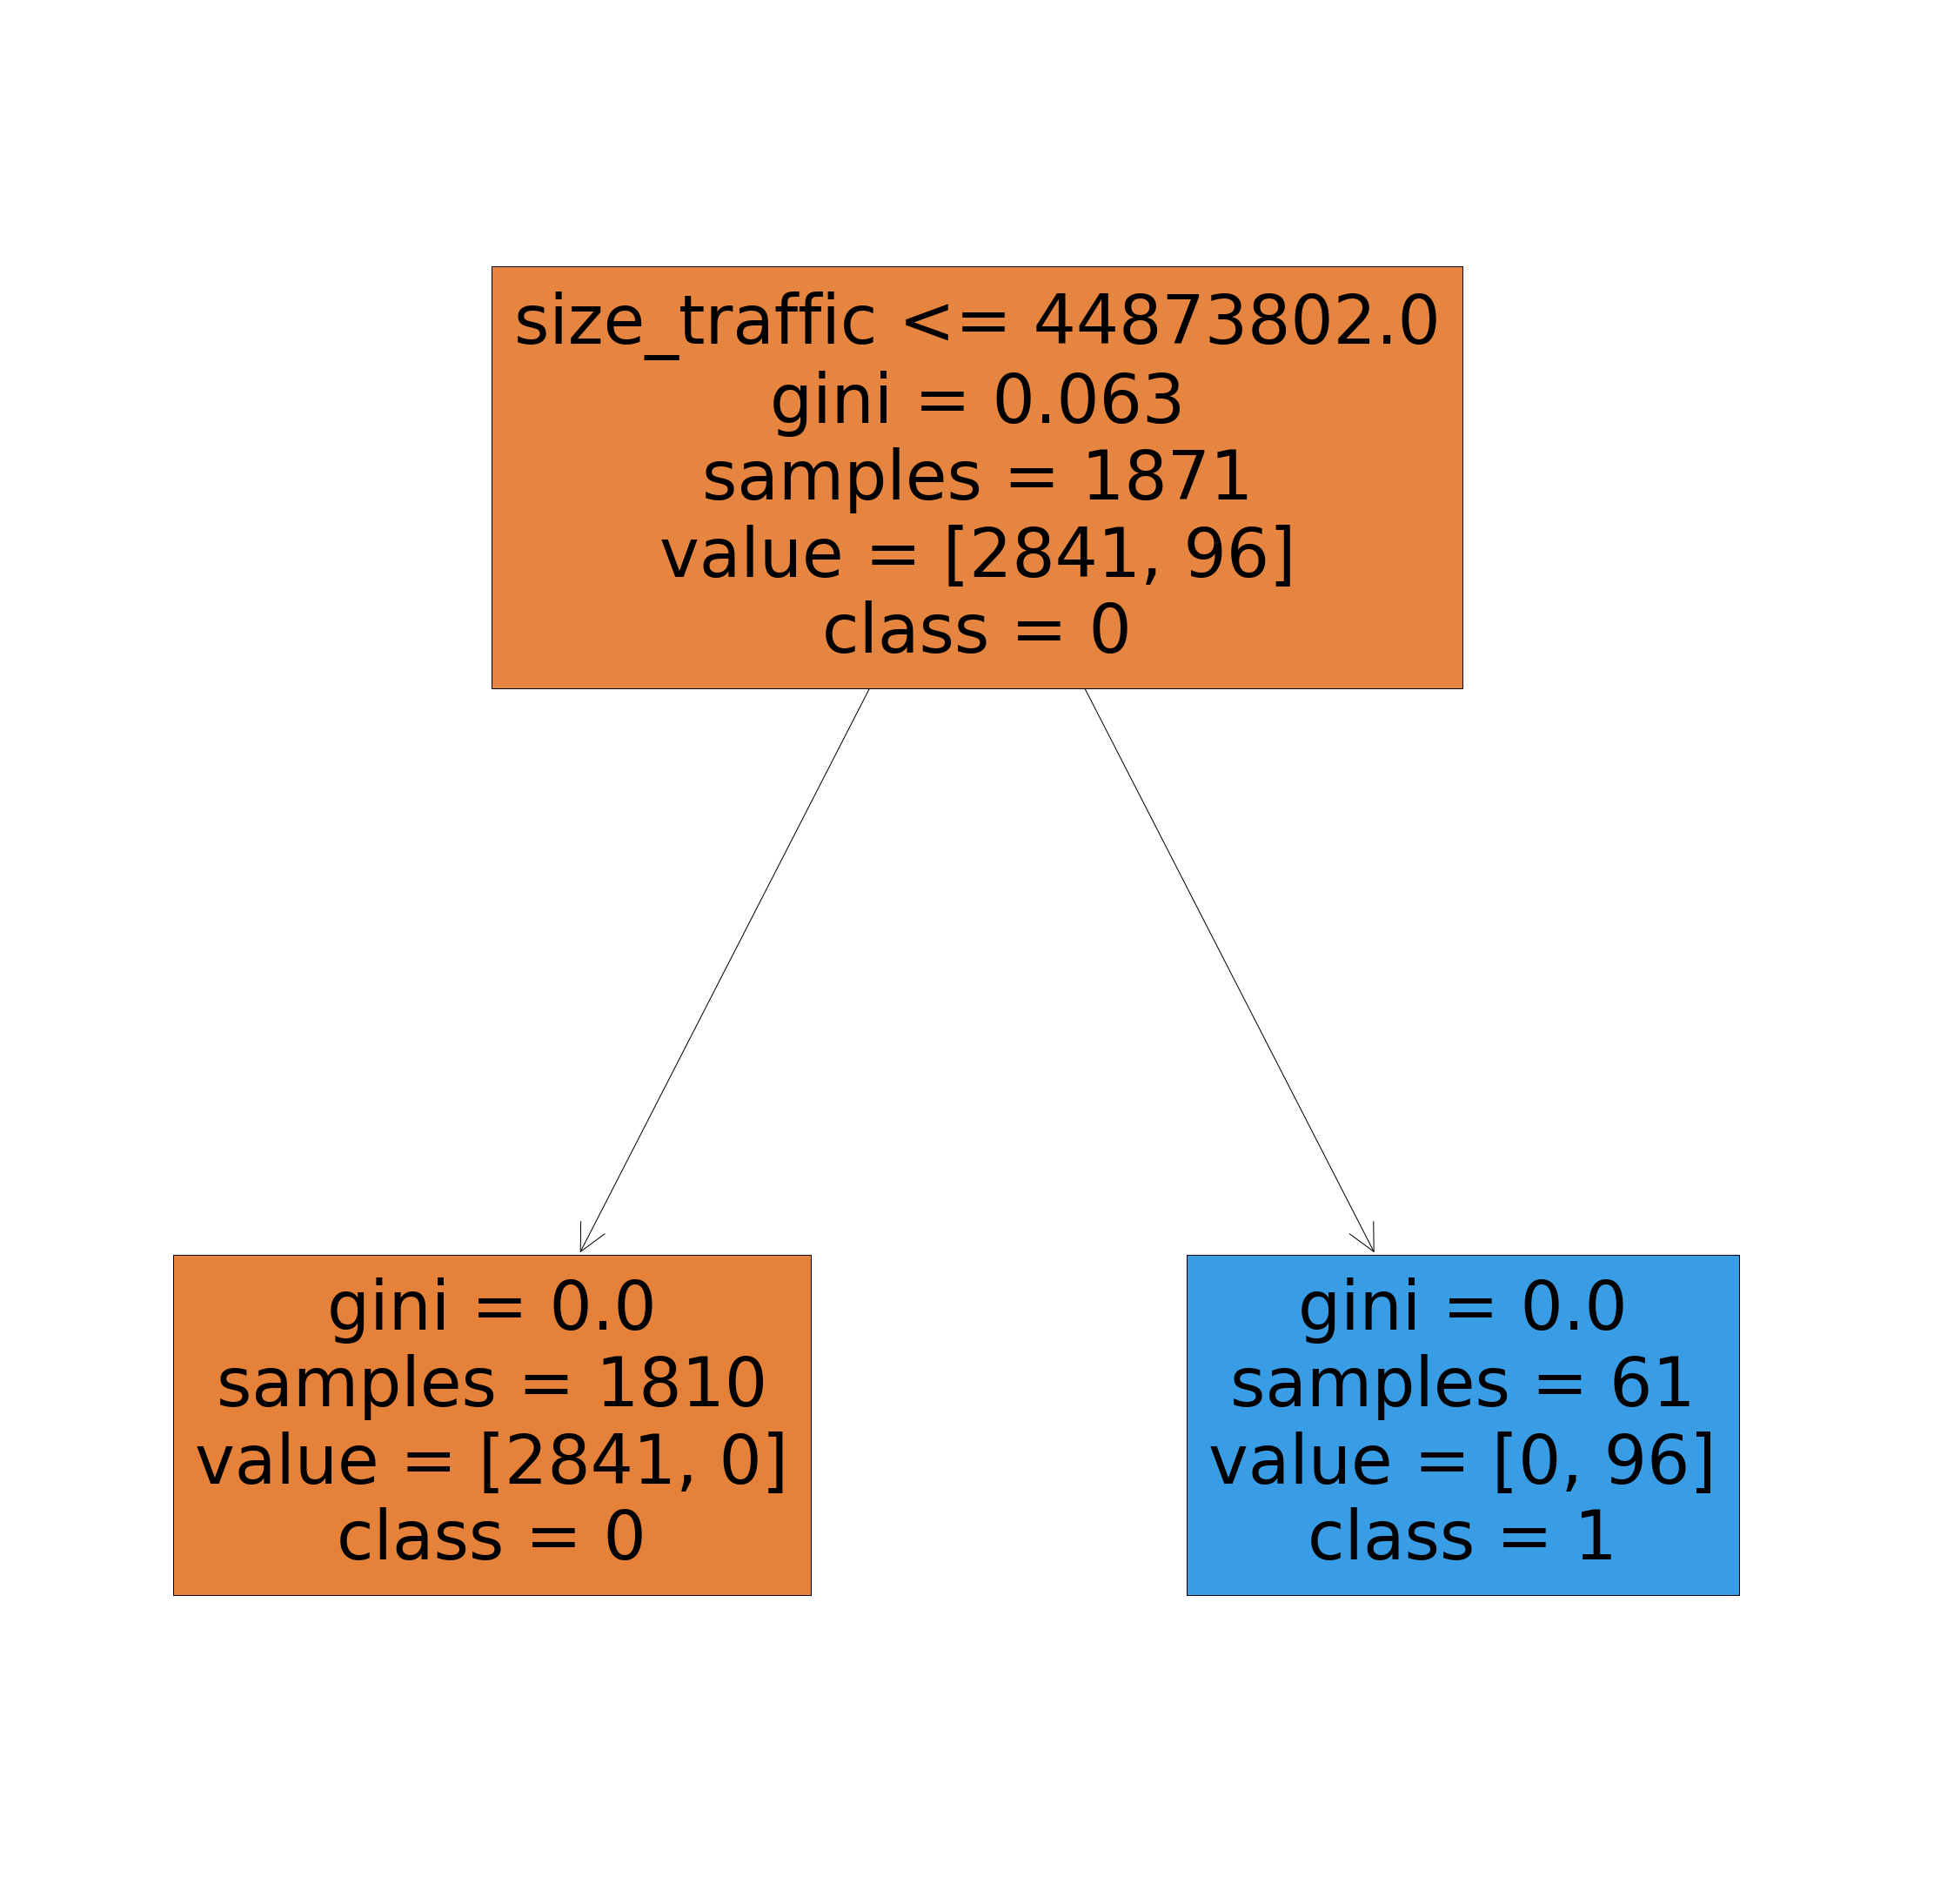

In [712]:
#Se viualiza de forma gráfica la estimación del bosque aleatorio mediante
#un árbol de decisión
from sklearn.tree import plot_tree
plt.figure(figsize=(40,40))
plot_tree(model.estimators_[3], feature_names = X_train.columns,class_names=["0", "1"],filled=True);

In [685]:
dfNetwork.target_traffic.value_counts()

0    3557
1     114
Name: target_traffic, dtype: int64

array([[<AxesSubplot:title={'center':'src_port'}>,
        <AxesSubplot:title={'center':'dst_port'}>],
       [<AxesSubplot:title={'center':'bidirectional_bytes'}>,
        <AxesSubplot:title={'center':'size_traffic'}>]], dtype=object)

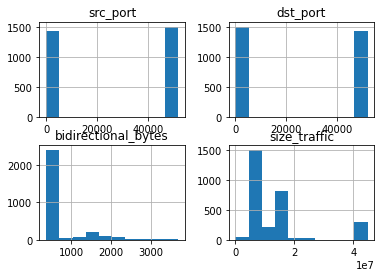

In [686]:
%matplotlib inline
X_train.hist()

In [687]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       711
           1       1.00      1.00      1.00        23

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [688]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [689]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0000


In [690]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [691]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [692]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [693]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0000


In [694]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 1.0000


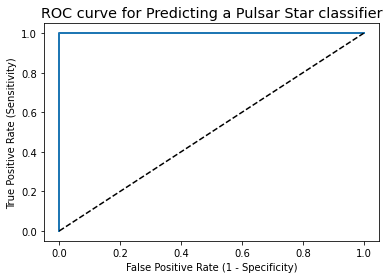

In [695]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [696]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_predicted)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 1.0000


In [697]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(model, X_train, y_train, cv=10, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 1.0000


In [698]:
dfNetwork.corr()

,src_port,dst_port,bidirectional_first_seen_ms,bidirectional_last_seen_ms,bidirectional_bytes,target_traffic,size_traffic
src_port,1.000000,-0.997792,-0.011851,-0.009526,-0.021394,0.017576,-0.029650
dst_port,-0.997792,1.000000,0.014400,0.007322,0.023438,-0.017162,0.032557
bidirectional_first_seen_ms,-0.011851,0.014400,1.000000,0.982591,-0.019044,0.034306,0.375761
bidirectional_last_seen_ms,-0.009526,0.007322,0.982591,1.000000,0.042291,0.028264,0.348870
bidirectional_bytes,-0.021394,0.023438,-0.019044,0.042291,1.000000,0.245672,0.131075
target_traffic,0.017576,-0.017162,0.034306,0.028264,0.245672,1.000000,0.439155
size_traffic,-0.029650,0.032557,0.375761,0.348870,0.131075,0.439155,1.000000


                             src_port  dst_port  bidirectional_first_seen_ms  \
src_port                     1.000000 -0.997792                    -0.011851   
dst_port                    -0.997792  1.000000                     0.014400   
bidirectional_first_seen_ms -0.011851  0.014400                     1.000000   
bidirectional_last_seen_ms  -0.009526  0.007322                     0.982591   
bidirectional_bytes         -0.021394  0.023438                    -0.019044   
target_traffic               0.017576 -0.017162                     0.034306   
size_traffic                -0.029650  0.032557                     0.375761   

                             bidirectional_last_seen_ms  bidirectional_bytes  \
src_port                                      -0.009526            -0.021394   
dst_port                                       0.007322             0.023438   
bidirectional_first_seen_ms                    0.982591            -0.019044   
bidirectional_last_seen_ms             

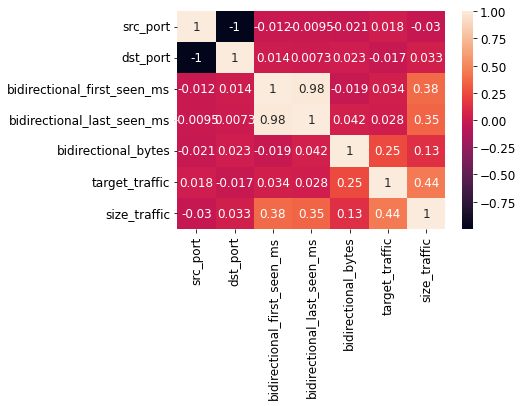

In [699]:
import seaborn as sn
correlation_matrix= dfNetwork.corr()
print(correlation_matrix)
sn.heatmap(correlation_matrix, annot=True)
print('Matrix de correlacion')
plt.show()



In [700]:
import numpy as np
covMatrix=dfNetwork.cov()
print (covMatrix)


                                 src_port      dst_port  \
src_port                     6.702792e+08 -6.687944e+08   
dst_port                    -6.687944e+08  6.702701e+08   
bidirectional_first_seen_ms -2.910168e+06  3.535992e+06   
bidirectional_last_seen_ms  -2.340424e+06  1.798873e+06   
bidirectional_bytes         -2.600635e+05  2.849070e+05   
target_traffic               7.894513e+01 -7.708138e+01   
size_traffic                -9.268450e+09  1.017708e+10   

                             bidirectional_first_seen_ms  \
src_port                                   -2.910168e+06   
dst_port                                    3.535992e+06   
bidirectional_first_seen_ms                 8.995723e+07   
bidirectional_last_seen_ms                  8.843567e+07   
bidirectional_bytes                        -8.480785e+04   
target_traffic                              5.644971e+01   
size_traffic                                4.303092e+10   

                             bidirectional_las

<AxesSubplot:>

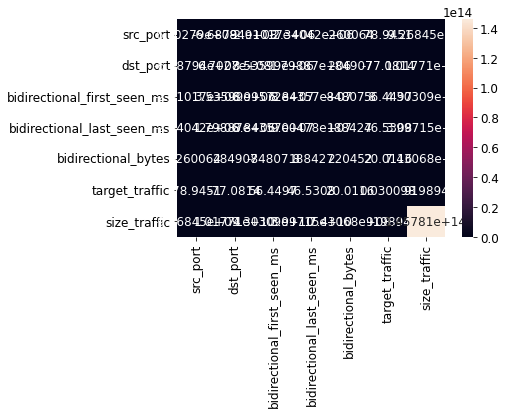

In [701]:
sn.heatmap(covMatrix, annot=True, fmt='g')

c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='src_port', ylabel='Density'>

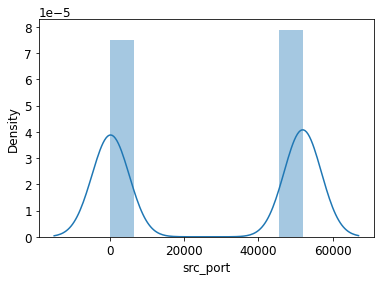

In [702]:
sn.distplot(dfNetwork['src_port'])


c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dst_port', ylabel='Density'>

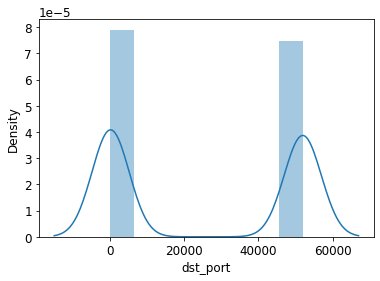

In [703]:
sn.distplot(dfNetwork['dst_port'])


c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target_traffic', ylabel='Density'>

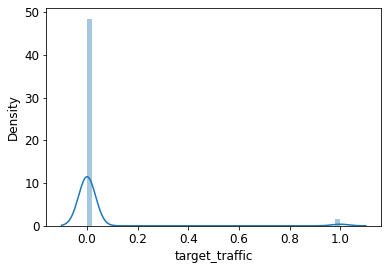

In [704]:
sn.distplot(dfNetwork['target_traffic'])


c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bidirectional_first_seen_ms', ylabel='Density'>

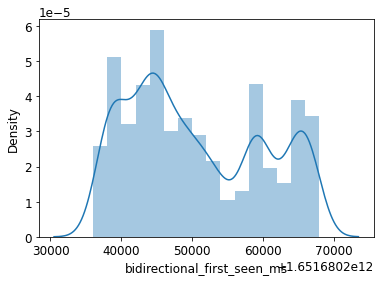

In [705]:
sn.distplot(dfNetwork['bidirectional_first_seen_ms'])


c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bidirectional_last_seen_ms', ylabel='Density'>

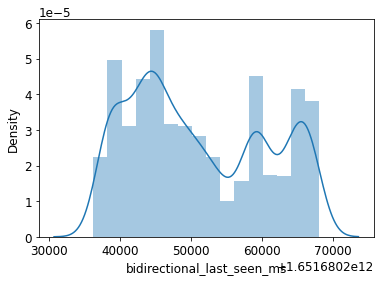

In [706]:
sn.distplot(dfNetwork['bidirectional_last_seen_ms'])


c:\users\jegjo\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='size_traffic', ylabel='Density'>

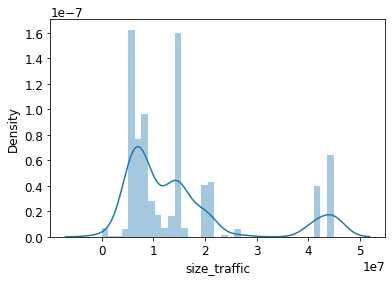

In [707]:
sn.distplot(dfNetwork['size_traffic'])


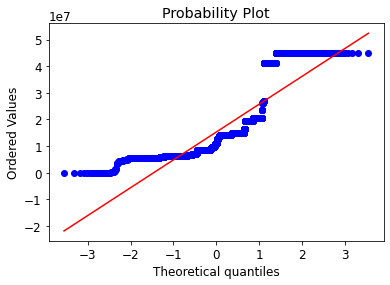

In [708]:
import pylab
import scipy.stats as stats

stats.probplot(dfNetwork['size_traffic'], dist="norm", plot=pylab)
pylab.show()

In [709]:
from scipy.stats import jarque_bera

result = (jarque_bera(dfNetwork['size_traffic']))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: 1684.7172418350128
p-value: 0.0


In [710]:
result = (jarque_bera(dfNetwork['size_traffic']))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: 1684.7172418350128
p-value: 0.0


In [715]:
from scipy.stats import shapiro

result = (shapiro(dfNetwork['size_traffic']))

print(f"S-W statistic: {result[0]}")
print(f"p-value: {result[1]}")

S-W statistic: 0.7450168132781982
p-value: 0.0
